# How does weekend and weather effect the demand of yellow taxi?



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop("index",axis = 1)
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,...,2019-01-01,0.00,0.06,0.0,0.0,58,39,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350141,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350142,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350143,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False
19350144,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,...,2019-10-31,5.14,0.54,0.0,0.0,71,60,0.0,3,False


## Weekend

In [2]:
#first think of weekend
start_date = "2019-07-01"
end_date = "2019-07-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
July= df.loc[between_two_dates]
July["DATE"] = July["tpep_pickup_datetime"].str[5:10]
date_count = July["DATE"].value_counts().sort_index()

In [3]:
#show the data used
July

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
11200176,2019-07-01 17:02:05,2019-07-01 17:17:10,1.0,3.24,1.0,90,142,13.5,2.00,16.80,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200177,2019-07-01 17:21:00,2019-07-01 17:23:37,1.0,0.73,1.0,142,43,4.5,0.00,5.80,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200178,2019-07-01 17:37:03,2019-07-01 17:42:23,1.0,1.37,1.0,48,68,6.0,1.00,8.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200179,2019-07-01 17:44:00,2019-07-01 17:51:05,1.0,1.45,1.0,68,246,7.0,1.00,9.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200180,2019-07-01 17:55:52,2019-07-01 17:58:37,1.0,0.45,1.0,246,50,4.0,0.00,5.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971811,2019-07-29 23:42:14,2019-07-30 00:18:30,2.0,19.85,2.0,132,239,52.0,10.00,71.42,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971812,2019-07-29 23:45:36,2019-07-30 00:18:08,1.0,18.95,2.0,132,113,52.0,15.36,76.78,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971813,2019-07-29 23:59:58,2019-07-30 00:27:35,5.0,18.08,2.0,132,100,52.0,12.28,73.70,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971814,2019-07-29 23:54:55,2019-07-30 00:29:46,4.0,18.99,2.0,132,230,52.0,0.00,55.30,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False


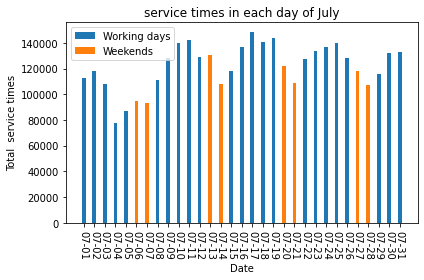

In [4]:
weekend_count = date_count
for i in range(len(weekend_count)):
    if weekend_count.index[i] not in["07-06","07-07","07-13","07-14","07-20","07-21","07-27","07-28"]:
        weekend_count[weekend_count.index[i]] = 0
labels = date_count.index
date_count = July["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.35

fig,ax = plt.subplots()
work_bar = ax.bar(x,date_count,width,label = "Working days")
weekend_bar = ax.bar(x,weekend_count,width,label = "Weekends")

ax.set_ylabel("Total  service times")
ax.set_title("service times in each day of July")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()


## Rain

In [5]:
#think of the rain
rain_days = July[July["Rainfall"]>0].groupby("DATE").count()
rain_days

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,final_amount,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
DATE,,,,,,,,,,,,,,,,,,,,,
07-02,117975,117975,117975,117975,117975,117975,117975,117975,117975,117975,...,117975,117975,117975,117975,117975,117975,117975,117975,117975,117975
07-05,86793,86793,86793,86793,86793,86793,86793,86793,86793,86793,...,86793,86793,86793,86793,86793,86793,86793,86793,86793,86793
07-08,111026,111026,111026,111026,111026,111026,111026,111026,111026,111026,...,111026,111026,111026,111026,111026,111026,111026,111026,111026,111026
07-09,128427,128427,128427,128427,128427,128427,128427,128427,128427,128427,...,128427,128427,128427,128427,128427,128427,128427,128427,128427,128427
07-10,139637,139637,139637,139637,139637,139637,139637,139637,139637,139637,...,139637,139637,139637,139637,139637,139637,139637,139637,139637,139637
07-11,141952,141952,141952,141952,141952,141952,141952,141952,141952,141952,...,141952,141952,141952,141952,141952,141952,141952,141952,141952,141952
07-17,148521,148521,148521,148521,148521,148521,148521,148521,148521,148521,...,148521,148521,148521,148521,148521,148521,148521,148521,148521,148521
07-18,141065,141065,141065,141065,141065,141065,141065,141065,141065,141065,...,141065,141065,141065,141065,141065,141065,141065,141065,141065,141065
07-22,127431,127431,127431,127431,127431,127431,127431,127431,127431,127431,...,127431,127431,127431,127431,127431,127431,127431,127431,127431,127431


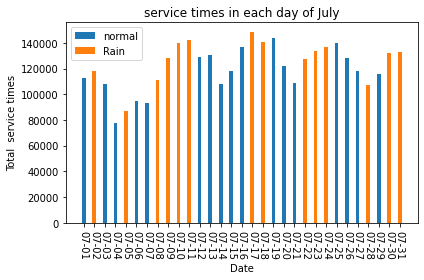

In [6]:
rain_count = date_count
for i in range(len(rain_count)):
    if rain_count.index[i] not in["07-02","07-05","07-08","07-09","07-10","07-11","07-17","07-18","07-22","07-23","07-24","07-28","07-28","07-30","07-31"]:
        rain_count[rain_count.index[i]] = 0
labels = date_count.index
date_count = July["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.35

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,label = "normal")
rain_bar = ax.bar(x,rain_count,width,label = "Rain")

ax.set_ylabel("Total  service times")
ax.set_title("service times in each day of July")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()


## High Temperature

In [7]:
#think of the high temperature
date_count = July["DATE"].value_counts().sort_index()
hot_days = July[July["Max_temp"]>90].groupby("DATE").count()
hot_days

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,final_amount,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
DATE,,,,,,,,,,,,,,,,,,,,,
07-16,137073,137073,137073,137073,137073,137073,137073,137073,137073,137073,...,137073,137073,137073,137073,137073,137073,137073,137073,137073,137073
07-17,148521,148521,148521,148521,148521,148521,148521,148521,148521,148521,...,148521,148521,148521,148521,148521,148521,148521,148521,148521,148521
07-19,143730,143730,143730,143730,143730,143730,143730,143730,143730,143730,...,143730,143730,143730,143730,143730,143730,143730,143730,143730,143730
07-20,122183,122183,122183,122183,122183,122183,122183,122183,122183,122183,...,122183,122183,122183,122183,122183,122183,122183,122183,122183,122183
07-21,109141,109141,109141,109141,109141,109141,109141,109141,109141,109141,...,109141,109141,109141,109141,109141,109141,109141,109141,109141,109141
07-30,132233,132233,132233,132233,132233,132233,132233,132233,132233,132233,...,132233,132233,132233,132233,132233,132233,132233,132233,132233,132233


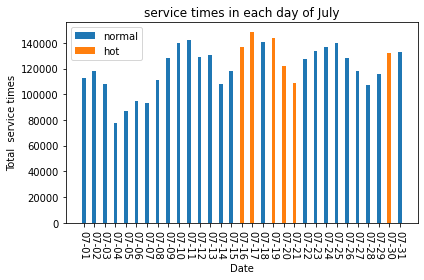

In [8]:
# when the minimal temperature of the day is lower than 90F,sign it as hot day.
hot_count = date_count
for i in range(len(hot_count)):
    if hot_count.index[i] not in["07-16","07-17","07-19","07-20","07-21","07-30"]:
        hot_count[hot_count.index[i]] = 0
labels = date_count.index
date_count = July["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.35

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,label = "normal")
rain_bar = ax.bar(x,hot_count,width,label = "hot")

ax.set_ylabel("Total  service times")
ax.set_title("service times in each day of July")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()


## Snow

In [9]:
#think of snow
start_date = "2019-01-01"
end_date = "2019-01-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
January = df.loc[between_two_dates]
January["DATE"] = January["tpep_pickup_datetime"].str[5:10]
date_count = January["DATE"].value_counts().sort_index()

In [10]:
snow_days = January[January["SNOW"]>0].groupby("DATE").count()
snow_days

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,final_amount,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
DATE,,,,,,,,,,,,,,,,,,,,,
01-03,196250,196250,196250,196250,196250,196250,196250,196250,196250,196250,...,3,196250,196250,196250,196250,196250,196250,196250,196250,196250
01-18,236094,236094,236094,236094,236094,236094,236094,236094,236094,236094,...,50,236094,236094,236094,236094,236094,236094,236094,236094,236094
01-19,210555,210555,210555,210555,210555,210555,210555,210555,210555,210555,...,4,210555,210555,210555,210555,210555,210555,210555,210555,210555
01-30,250189,250189,250189,250189,250189,250189,250189,250189,250189,250189,...,250189,250189,250189,250189,250189,250189,250189,250189,250189,250189


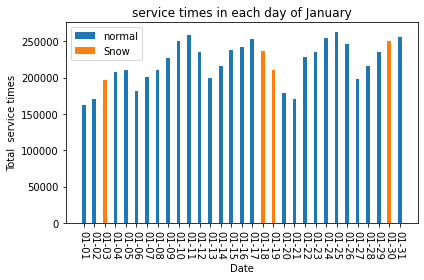

In [11]:
snow_count = date_count
for i in range(len(snow_count)):
    if snow_count.index[i] not in["01-03","01-18","01-19","01-30"]:
        snow_count[snow_count.index[i]] = 0
labels = date_count.index
date_count = January["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.35

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,label = "normal")
rain_bar = ax.bar(x,snow_count,width,label = "Snow")

ax.set_ylabel("Total  service times")
ax.set_title("service times in each day of January")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()


## Freezing

In [12]:
#think of the low temperature
date_count = January["DATE"].value_counts().sort_index()
cold_days = January[January["Min_temp"]<14].groupby("DATE").count()
cold_days


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,final_amount,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
DATE,,,,,,,,,,,,,,,,,,,,,
01-02,171159,171159,171159,171159,171159,171159,171159,171159,171159,171159,...,0,171159,171159,171159,171159,171159,171159,171159,171159,171159
01-21,170904,170904,170904,170904,170904,170904,170904,170904,170904,170904,...,169384,170904,170904,170904,170904,170904,170904,170904,170904,170904
01-22,228944,228944,228944,228944,228944,228944,228944,228944,228944,228944,...,226715,228944,228944,228944,228944,228944,228944,228944,228944,228944
01-30,250189,250189,250189,250189,250189,250189,250189,250189,250189,250189,...,250189,250189,250189,250189,250189,250189,250189,250189,250189,250189
01-31,256600,256600,256600,256600,256600,256600,256600,256600,256600,256600,...,256600,256600,256600,256600,256600,256600,256600,256600,256600,256600


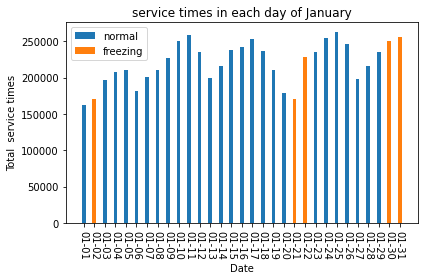

In [13]:
# when the minimal temperature of the day is lower than 14F,sign it as freezing day.
freezing_count = date_count
for i in range(len(freezing_count)):
    if freezing_count.index[i] not in["01-02","01-21","01-22","01-30","01-31"]:
        freezing_count[freezing_count.index[i]] = 0
labels = date_count.index
date_count = January["DATE"].value_counts().sort_index()
x = np.arange(len(labels))

width = 0.35

fig,ax = plt.subplots()
normal_bar = ax.bar(x,date_count,width,label = "normal")
rain_bar = ax.bar(x,freezing_count,width,label = "freezing")

ax.set_ylabel("Total  service times")
ax.set_title("service times in each day of January")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation = 270)
fig.tight_layout()
plt.show()


## what is the effect of time?

In [14]:
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop("index",axis = 1)
df = df.drop(columns = "final_amount")

In [15]:
#convert the pickup and dropoff date and time to  datetime64[ns]
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

df["DATE"] = df["tpep_pickup_datetime"].dt.normalize()
df["hour"] = df["tpep_pickup_datetime"].dt.hour

In [16]:
#show data
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend,hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350141,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23
19350142,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23
19350143,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23
19350144,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23


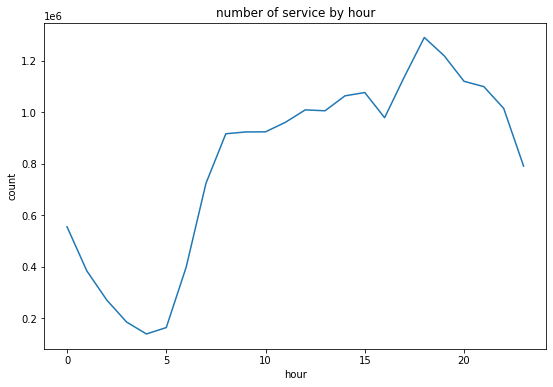

In [17]:
plt.figure(figsize = (9,6))
count = df.groupby("hour").count()["tpep_pickup_datetime"]
plt.plot(count.index,count)
plt.ylabel("count")
plt.xlabel("hour")
plt.title("number of service by hour")
plt.show()

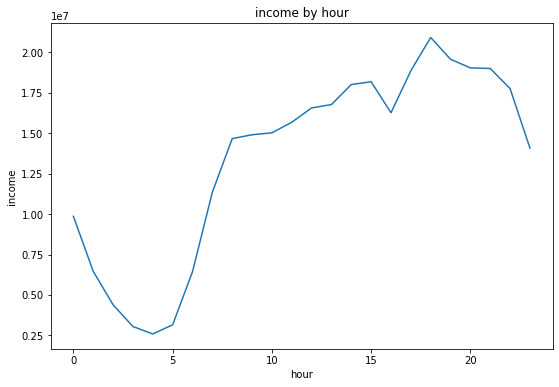

In [18]:
plt.figure(figsize = (9,6))
income = df.groupby("hour").sum()["total_amount"]
plt.plot(income.index,income)
plt.ylabel("income")
plt.xlabel("hour")
plt.title("income by hour")
plt.show()

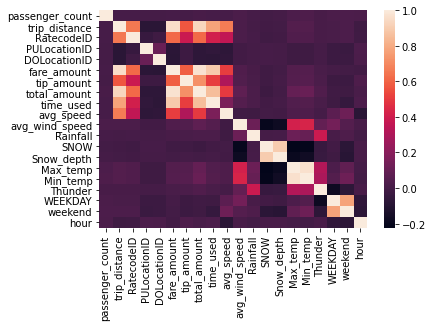

In [19]:
sns.heatmap(df.corr())
plt.show()

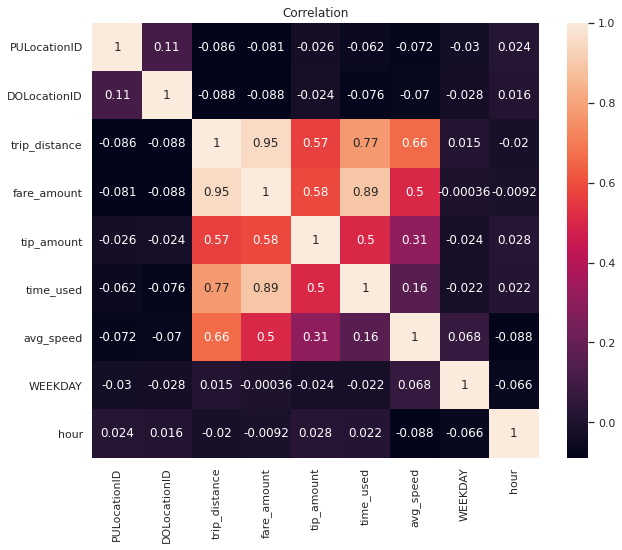

In [20]:
CORR_COLS = ["PULocationID","DOLocationID","trip_distance", "fare_amount", "tip_amount","time_used","avg_speed","WEEKDAY","hour"]
sns.set()
plt.figure(figsize=(10, 8))
df[CORR_COLS].corr()
sns.heatmap(df[CORR_COLS].corr(),annot = True)
plt.title("Correlation")
plt.show()

## Event

In [21]:
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop("index",axis = 1)

In [22]:
# select the July
start_date = "2019-07-01"
end_date = "2019-07-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
July= df.loc[between_two_dates]
July["DATE"] = July["tpep_pickup_datetime"].str[5:10]


In [23]:
#show data
July

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
11200176,2019-07-01 17:02:05,2019-07-01 17:17:10,1.0,3.24,1.0,90,142,13.5,2.00,16.80,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200177,2019-07-01 17:21:00,2019-07-01 17:23:37,1.0,0.73,1.0,142,43,4.5,0.00,5.80,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200178,2019-07-01 17:37:03,2019-07-01 17:42:23,1.0,1.37,1.0,48,68,6.0,1.00,8.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200179,2019-07-01 17:44:00,2019-07-01 17:51:05,1.0,1.45,1.0,68,246,7.0,1.00,9.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200180,2019-07-01 17:55:52,2019-07-01 17:58:37,1.0,0.45,1.0,246,50,4.0,0.00,5.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971811,2019-07-29 23:42:14,2019-07-30 00:18:30,2.0,19.85,2.0,132,239,52.0,10.00,71.42,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971812,2019-07-29 23:45:36,2019-07-30 00:18:08,1.0,18.95,2.0,132,113,52.0,15.36,76.78,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971813,2019-07-29 23:59:58,2019-07-30 00:27:35,5.0,18.08,2.0,132,100,52.0,12.28,73.70,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971814,2019-07-29 23:54:55,2019-07-30 00:29:46,4.0,18.99,2.0,132,230,52.0,0.00,55.30,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False


In [24]:
# pick the day of event
event = July[(July["DATE"]== "07-19")|(July["DATE"]== "07-20")]
clean = event[["tpep_pickup_datetime","tpep_dropoff_datetime","PULocationID","DOLocationID","total_amount"]]

#show the cleaned sample data
clean

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,total_amount
13722546,2019-07-19 00:00:34,2019-07-19 00:44:12,43,226,36.36
13722547,2019-07-19 00:06:10,2019-07-19 00:22:56,261,170,24.36
13722548,2019-07-19 23:56:39,2019-07-20 00:26:23,249,188,26.80
13722549,2019-07-19 00:00:14,2019-07-19 00:05:38,141,229,11.16
13722550,2019-07-19 00:00:02,2019-07-19 00:10:07,161,143,14.72
...,...,...,...,...,...
13988454,2019-07-20 23:29:00,2019-07-21 00:02:43,132,75,63.92
13988455,2019-07-20 23:50:34,2019-07-21 00:27:26,132,236,73.65
13988456,2019-07-20 23:59:36,2019-07-21 00:46:38,132,87,61.42
13988457,2019-07-20 20:35:30,2019-07-20 21:07:44,132,186,61.42


# the location of event

In [25]:
#https://www.alltopsights.com/attraction-randall-s-island-park-new-york-ny/
#https://www.goodhousekeeping.com/life/a27505449/pinknic-nyc-2019/

# big event pinknic was held in 2019-07-19 and 2019-07-20 in Randall'S Island Park
event_coord = [40.796667,-73.921944]
enent_coordM = np.array(event_coord)

In [26]:
DO_count = clean["DOLocationID"].value_counts().sort_index()
DO_count = pd.DataFrame({"LocationID": DO_count.index,"DO_Count":DO_count})
#show the DO_count
DO_count

,LocationID,DO_Count
1,1,2
2,2,2
3,3,18
4,4,1273
6,6,1
...,...,...
261,261,1438
262,262,2748
263,263,4502
264,264,2119


In [27]:
import geopandas as gpd

# sf stands for shape file
sf = gpd.read_file("../raw_data/taxi_zones/taxi_zones.shp")
zone = pd.read_csv("../raw_data/taxi_zones/taxi+_zone_lookup.csv")

# Convert the geometry shaape to to latitude and longitude
# Please attribute this if you are using it
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
sf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


In [28]:
gdf = gpd.GeoDataFrame(pd.merge(DO_count, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID',axis=1)
gdf

,DO_Count,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,2,1,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,2,2,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,18,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,1273,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,1,6,0.150491,0.000606,Arrochar/Fort Wadsworth,Staten Island,"POLYGON ((-74.06367 40.60220, -74.06351 40.602..."
...,...,...,...,...,...,...,...
244,15,259,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
245,376,260,0.133514,0.000422,Woodside,Queens,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
246,1438,261,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."
247,2748,262,0.049064,0.000122,Yorkville East,Manhattan,"MULTIPOLYGON (((-73.94383 40.78286, -73.94376 ..."


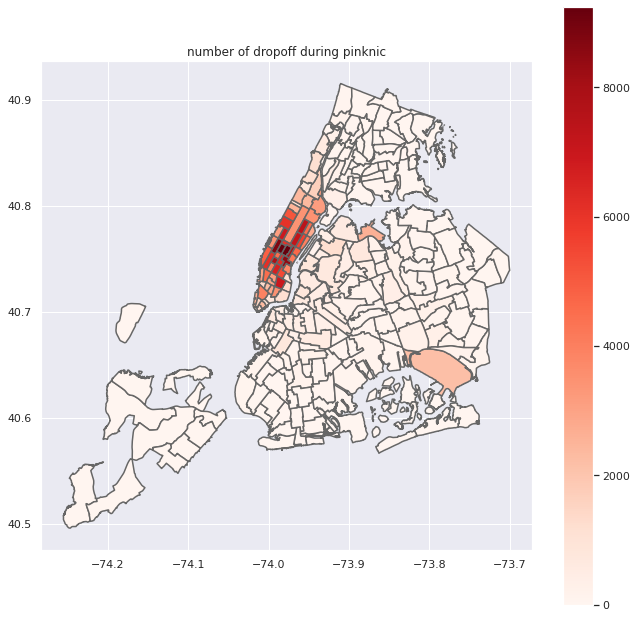

In [29]:
variable = "DO_Count"
vmin,vmax = 0,gdf["DO_Count"].max()
fig,ax = plt.subplots(1,figsize = (11,11))

ax.set_title("number of dropoff during pinknic")

sn = plt.cm.ScalarMappable(cmap="Reds",norm = plt.Normalize(vmin = vmin,vmax = vmax))

sn.set_array([])
fig.colorbar(sn)

gdf.plot(column = variable,cmap = "Reds",Linewidth =1.5,ax=ax,edgecolor="0.4")
plt.savefig("../plots/number of dropoff during pinknic.png")
plt.show()